In [1]:
# pip install PyPDF2

In [2]:
# pip install py-readability-metrics

In [3]:
# 1: Import libraries
import matplotlib.pyplot as plt
import numpy as np
import PyPDF2
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from readability import Readability
from wordcloud import WordCloud

# 2: Import nltk and download data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/Paula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Paula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Paula/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

3: Characterize the issue at hand and your impressions from a news reporting objectivity perspective

From a news reporting objectivity perspective, both articles provide factual information about the plagiarism allegations against Harvard University President Claudine Gay and the actions taken in response. The first article (fox news article) focuses on the seriousness of the allegations and Harvard's response to the issue at hand, while the second article remarks Gay's actions and response to the matter and the steps taken to address the citation errors. Overall, both articles tackle the same issue emphasizing different points but both appear to present the information objectively.

In [4]:
# 4: Use PyPDF2 to extract the text out of each document

# Define function to extract text
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

# Define the path of each article
pdf_path_article1 = 'foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf'
pdf_path_article2 = 'reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf'

# Extract text of each document
text_article1 = extract_text_from_pdf(pdf_path_article1)
text_article2 = extract_text_from_pdf(pdf_path_article2)

# 4a: Display the text
print("Text 1: \n", text_article1)
print("Text 2: \n",text_article2)

Text 1: 
 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation,

4b: Briefly note any anomalies in your notebook

Given the text extracted from the pdf documents, we can observe some anomalies in the notebook. There are some formatting inconsistencies in terms of spacing indentation, and alignment (in some cases there are spaces in between words). The lines are also broken in a way such that paragraphs are not defined as in the article. Additionally, the text includes metadata, image captions, and advertisement notices that are not part of the body of the article text.

In [6]:
# 5: Use NLTK to complete sentiment analysis for each of the articles
sid = SentimentIntensityAnalyzer()

sentiment_article1 = sid.polarity_scores(text_article1)
sentiment_article2 = sid.polarity_scores(text_article2)

print(sentiment_article1)
print(sentiment_article2)

{'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


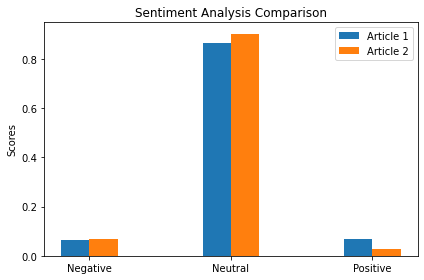

In [7]:
# Plot the sentiment scores
labels = ['Negative', 'Neutral','Positive']
scores_article1 = [sentiment_article1['neg'], sentiment_article1['neu'], sentiment_article1['pos']]
scores_article2 = [sentiment_article2['neg'], sentiment_article2['neu'], sentiment_article2['pos']]

x = np.arange(len(labels))
width = 0.20


fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_article1, width, label = 'Article 1')
rects2 = ax.bar(x + width/2, scores_article2, width, label = 'Article 2')

ax.set_ylabel('Scores')
ax.set_title('Sentiment Analysis Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

5a: Compare the results from the two articles

As shown in the graph, most of the content of both articles is classified as neutral sentiment (0.866 neutral sentiment for the first article and 0.904 for the second one). However, looking at the compound values, the overall sentiment of the first article is slightly positive (compound score of 0.7243). Contrastingly, the sentiment of the second article is negative overall (compound score of -0.9719).

5b: Compare the results to your reading of the articles; do you agree with the outcome?

Comparing the results to the reading, the articles are primarily neutral. However, the compound scores reflect an overall positive sentiment for the first article and an overall negative sentiment for the second. The compound scores do not match the objectivity and neutrality of both texts.

In [9]:
# 6: Run sentiment analysis on the article headlines

headline1 = 'Embattled Harvard University President Claudine Gay hit with more plagiarism charges'
headline2 = 'Harvard president will submit dissertation edits after plagiarism allegations'

sentiment_headline1 = sid.polarity_scores(headline1)
sentiment_headline2 = sid.polarity_scores(headline2)

print(sentiment_headline1)
print(sentiment_headline2)

{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


6a: Do those results agree with the overall sentiment?
These results do not agree with the overall sentiment. The compound score for the first article is positive (0.7243) while the sentiment score of the headline is slightly negative (-0.3353). The headline of the second article has a neutral score of one while the compound score of the article is negative (-0.9719).

In [11]:
# 7: Using py-readability-metrics complete 2-3 different readability scores
def calculate_readability_scores(text):
    rd = Readability(text)
    flesch = rd.flesch()
    fk = rd.flesch_kincaid()
    return flesch.score, fk.grade_level

flesch_score1, fk_grade_level1 = calculate_readability_scores(text_article1)
flesch_score2, fk_grade_level2 = calculate_readability_scores(text_article2)

print("Article 1:")
print("Flesch Reading Ease Score:", flesch_score1)
print("Flesch-Kincaid Grade Level:", fk_grade_level1)

print("\nArticle 2:")
print("Flesch Reading Ease Score:", flesch_score2)
print("Flesch-Kincaid Grade Level:", fk_grade_level2)

Article 1:
Flesch Reading Ease Score: 21.41115320671068
Flesch-Kincaid Grade Level: 19

Article 2:
Flesch Reading Ease Score: 16.550377619402184
Flesch-Kincaid Grade Level: 19


7a: Discuss what the chosen metric is measuring
The two chosen metrics are:
- Flesch Reading Ease: This metric measures the ease of readability of a text. It assigns a score between 0 and 100, where higher scores indicate easier readability. The formula for Flesch Reading Ease is based on the average number of syllables per word and the average number of words per sentence.
- Flesch-Kincaid Grade Level: This metric estimates the grade level required to understand the text. It provides a grade level equivalent (e.g., "Grade 8" means eighth-grade level). The formula for Flesch-Kincaid Grade Level is similar to Flesch Reading Ease but adjusted to estimate grade level.

7b: Compare the scores from both articles 

Given the Flesch Reading Ease Score, Article 1 has a slightly higher Flesch Reading Ease score (21.41) compared to Article 2 (16.55), indicating that it may be slightly easier to read and comprehend.

According to the Flesch-Kincaid Grade Level, both articles have the same level of 19, indicating that the content of both articles requires a very high level of education to comprehend, roughly equivalent to a college graduate or beyond.

Overall, both articles have relatively low Flesch Reading Ease scores and high Flesch-Kincaid Grade Levels, suggesting that they are written in a complex manner and may be challenging for many readers to understand easily.

In [13]:
# pip install --upgrade Pillow

In [14]:
# pip install --upgrade pip

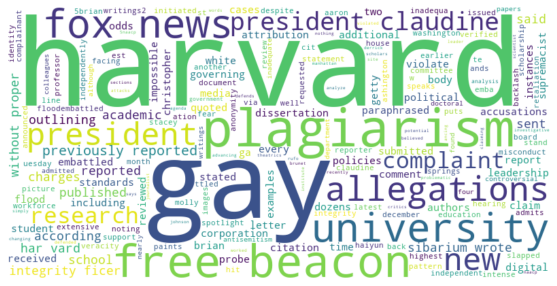

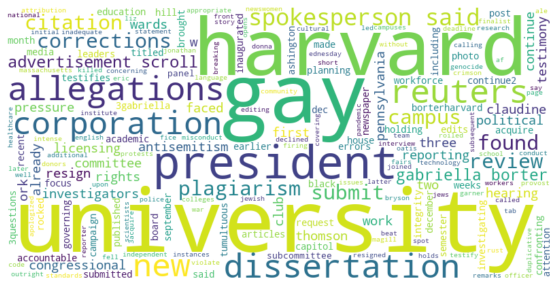

In [15]:
# 8: Using wordcloud, create word clouds for both articles

def generate_wordcloud(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    
    # Join the words back into a single string
    cleaned_text = ' '.join(filtered_words)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white', colormap='viridis').generate(cleaned_text)
    
    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



generate_wordcloud(text_article1)
generate_wordcloud(text_article2)

8a: Briefly comment on the word clouds

Both wordclouds display "harvard", "gay", "president", "alegations", "university", and "plagiarism" as prominent words in the texts. These words dominate the visual space, giving insights into the underlying text. The wordclouds align with the main topic of both articles, since the words that stand out refer to the issue at hand.